In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#modelling
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [19]:
df=pd.read_csv("E:\Study\Machine learning\GitCodes\HousingML\DataSet\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mode()[0], inplace=True)
df.isna().sum()

C:\Users\lalit\AppData\Local\Temp\ipykernel_6400\3792116590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mode()[0], inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
X=df.drop('median_house_value', axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [24]:
y=df['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [25]:
numeric_features=X.select_dtypes(exclude='object').columns
numeric_features
cat_features=X.select_dtypes(include='object').columns
cat_features

Index(['ocean_proximity'], dtype='object')

In [26]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

oh_encoder=OneHotEncoder()
min_scalar=MinMaxScaler()

preprocessor=ColumnTransformer(
    [
        ("Onehotencoder", oh_encoder, cat_features),
        ("Minscalar", min_scalar, numeric_features)
    ]
)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [28]:
X_train=preprocessor.fit_transform(X_train)

In [29]:
X_train=pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,1.0,0.729084,0.017021,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322
1,0.0,0.0,0.0,0.0,1.0,0.616534,0.129787,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452
2,0.0,0.0,0.0,0.0,1.0,0.385458,0.224468,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162
3,0.0,0.0,0.0,0.0,1.0,0.721116,0.014894,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488
4,0.0,1.0,0.0,0.0,0.0,0.453187,0.450000,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638


In [30]:
X_test=preprocessor.transform(X_test)
X_test=pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.531873,0.373404,0.470588,0.038227,0.043296,0.038930,0.058872,0.081468
1,0.0,1.0,0.0,0.0,0.0,0.487052,0.275532,0.568627,0.074800,0.043296,0.043779,0.095872,0.140095
2,0.0,0.0,0.0,1.0,0.0,0.190239,0.558511,1.000000,0.097360,0.043296,0.036632,0.158198,0.205528
3,1.0,0.0,0.0,0.0,0.0,0.560757,0.184043,0.313725,0.077547,0.043296,0.047703,0.081237,0.361216
4,0.0,0.0,0.0,0.0,1.0,0.241036,0.432979,0.647059,0.059744,0.043296,0.029709,0.070219,0.222418


In [31]:
def modelevaluate(y_test, y_pred):
    mse=mean_squared_error(y_test, y_pred)
    mae=mean_absolute_error(y_test, y_pred)
    r2score=r2_score(y_test, y_pred)
    print("mae: {0}, mse: {1}, r2Score={2} .".format(mae,mse,r2score))
    return mae, mse, r2score

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [33]:
model_list=[]
r2list=[]

In [34]:
for num in range(len(models)):
    model=list(models.values())[num]
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    modelname= list(models.keys())[num]
    print("Evaluated models: "+modelname)
    mae,mse,r2score=modelevaluate(y_test,y_pred)
    model_list.append(modelname)
    r2list.append(r2score)

Evaluated models: Linear Regression
mae: 50721.0382751938, mse: 4933841245.722868, r2Score=0.6234884431007117 .


e:\Study\Machine learning\GitCodes\HousingML\housing\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.288e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


Evaluated models: Lasso
mae: 50747.37433643361, mse: 4935094098.552711, r2Score=0.6233928353285851 .
Evaluated models: Ridge
mae: 50660.5525454535, mse: 4918022093.689603, r2Score=0.6246956350763422 .
Evaluated models: K-Neighbors Regressor
mae: 41964.787645348835, mse: 3977817357.173634, r2Score=0.6964445891912707 .
Evaluated models: Decision Tree
mae: 43522.13250968992, mse: 4731436730.90189, r2Score=0.6389343472559692 .
Evaluated models: Random Forest Regressor
mae: 31621.43359253876, mse: 2413324964.3451633, r2Score=0.8158342163081923 .
Evaluated models: XGBRegressor
mae: 31419.595542257146, mse: 2242198681.776429, r2Score=0.8288932143317296 .
Evaluated models: AdaBoost Regressor
mae: 71767.72470833657, mse: 7174883191.847991, r2Score=0.452469930305301 .


In [35]:
modeltable=pd.DataFrame(list(zip(model_list,r2list)),columns=["modelName", "r2score"]).sort_values(by="r2score",ascending=False)
modeltable

,modelName,r2score
6,XGBRegressor,0.828893
5,Random Forest Regressor,0.815834
3,K-Neighbors Regressor,0.696445
4,Decision Tree,0.638934
2,Ridge,0.624696
0,Linear Regression,0.623488
1,Lasso,0.623393
7,AdaBoost Regressor,0.452470


In [36]:
XGBRegressor=XGBRegressor()
XGBRegressor.fit(X_train, y_train)
y_pred=XGBRegressor.predict(X_test)
r2scoreXGB=r2_score(y_test,y_pred)
r2scoreXGB

0.8288932143317296

<Axes: xlabel='median_house_value'>

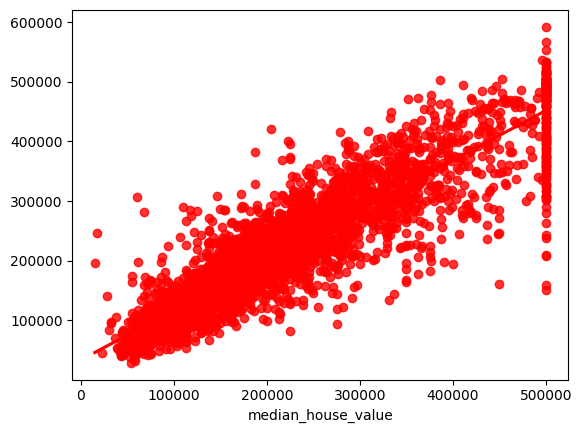

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [38]:
prediction_dt=pd.DataFrame(list(zip(y_test,y_pred,y_test-y_pred)), columns=["Test", "Predict", "Differance"])
prediction_dt

,Test,Predict,Differance
0,47700.0,69382.054688,-21682.054688
1,45800.0,81345.031250,-35545.031250
2,500001.0,500920.656250,-919.656250
3,218600.0,231558.046875,-12958.046875
4,278000.0,263939.562500,14060.437500
...,...,...,...
4123,263300.0,220529.718750,42770.281250
4124,266800.0,239993.703125,26806.296875
4125,500001.0,498305.468750,1695.531250
4126,72300.0,80824.367188,-8524.367188
